R.matlab v3.6.2 (2018-09-26) successfully loaded. See ?R.matlab for help.


Attaching package: ‘R.matlab’


The following objects are masked from ‘package:base’:

    getOption, isOpen




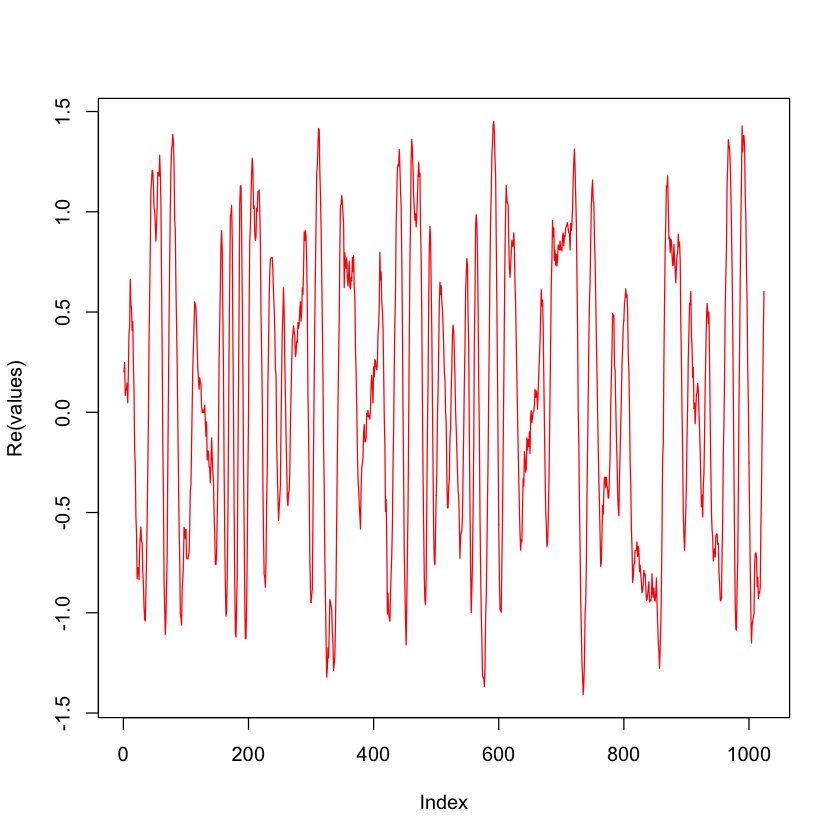

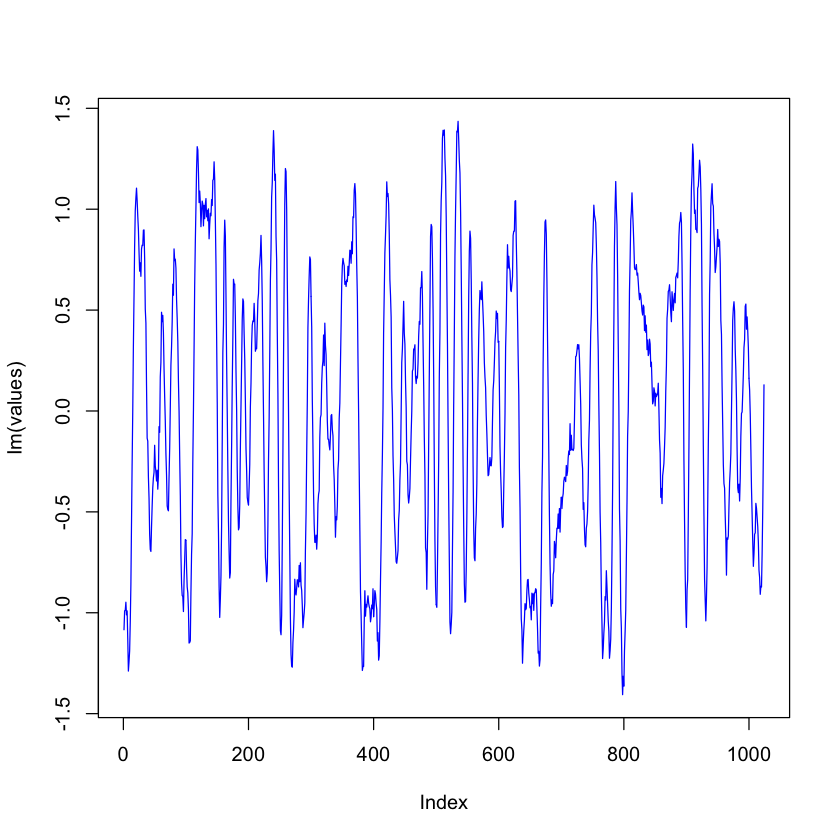

In [1]:
library(R.matlab)
signal <- readMat("../dataset/origin/frameBPSK001.mat")
values <- signal['frame']$frame
plot(Re(values), type='l', col='red')
plot(Im(values), type='l', col='blue')

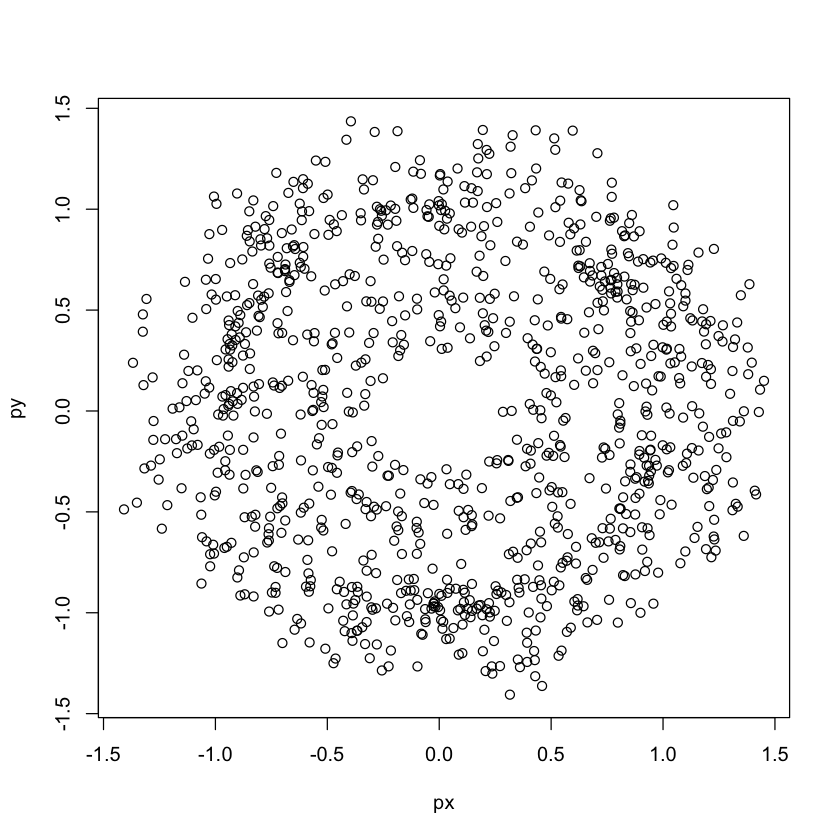

In [2]:
mod=Mod(values)
arg=Arg(values)

px = Mod(values) * cos(Arg(values)) 
py = Mod(values) * sin(Arg(values))
plot(px,py);

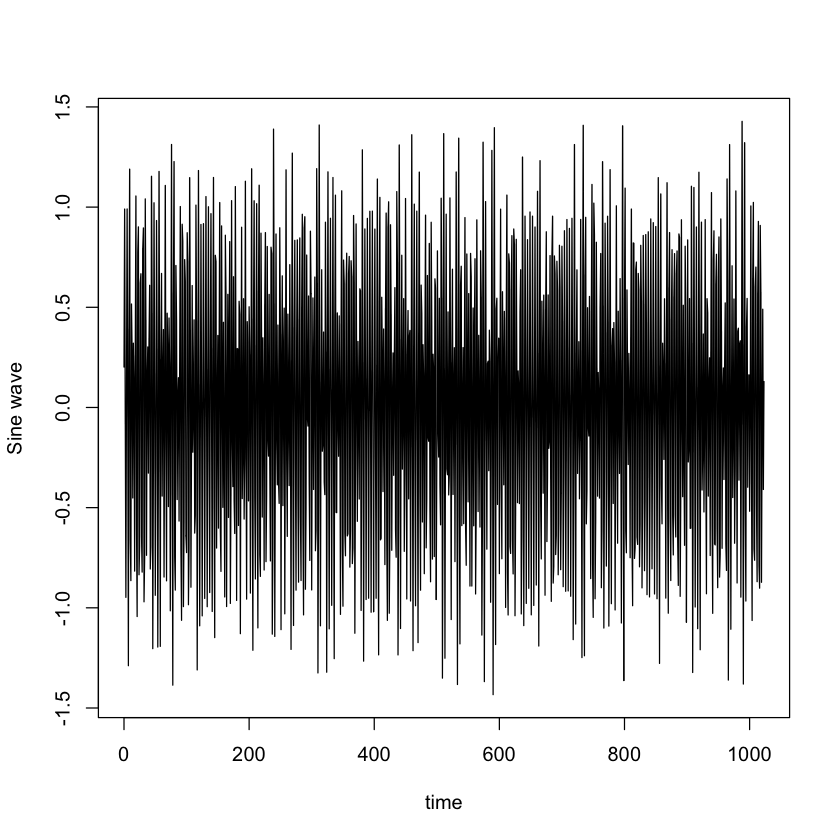

In [3]:
t=seq(0,1023)
s = Mod(values) * cos((pi*2.5*t) + Arg(values))
plot(t,s,type="l", xlab="time", ylab="Sine wave")

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“les parties imaginaires sont perdues lors de la conversion automatique”


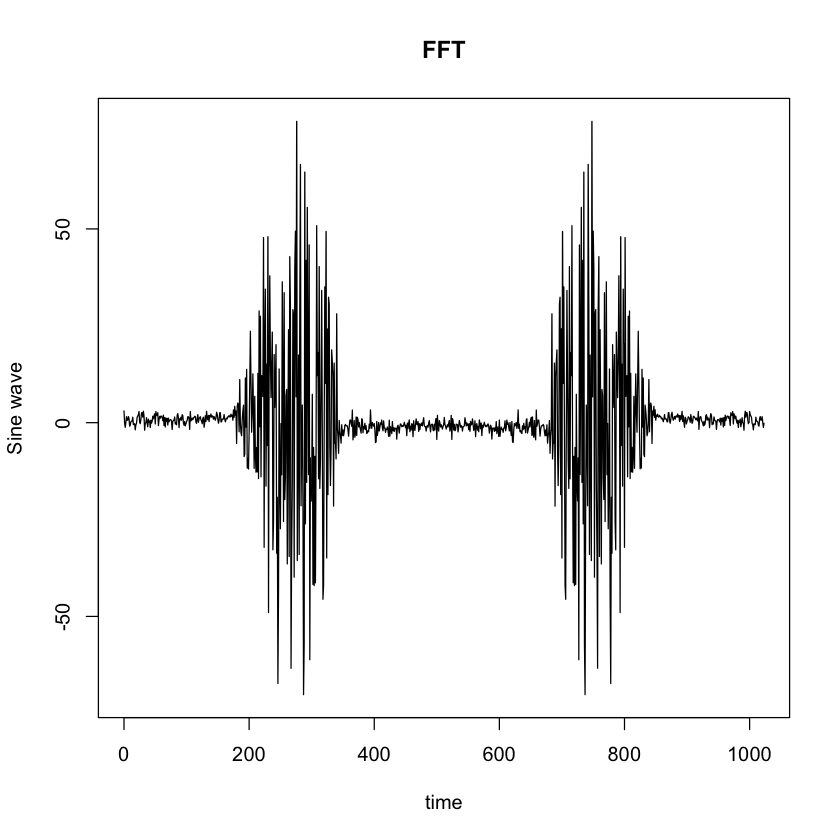

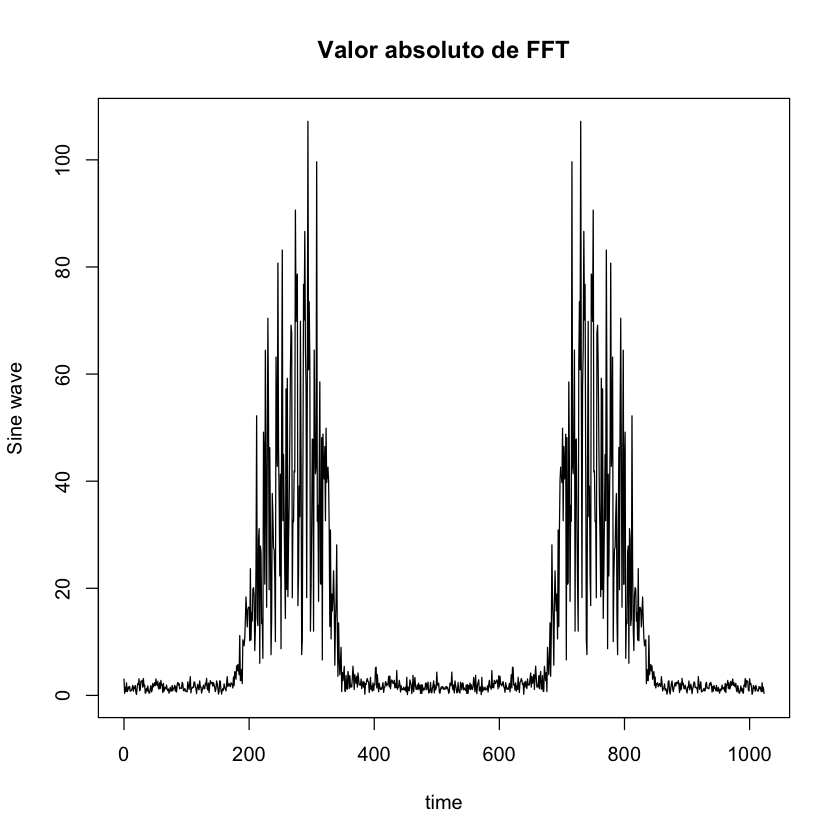

In [4]:
f_s <- fft(s)
plot(t, f_s, type="l", xlab="time", ylab="Sine wave")
title("FFT")
plot(t, abs(f_s), type="l", xlab="time", ylab="Sine wave")
title("Valor absoluto de FFT")

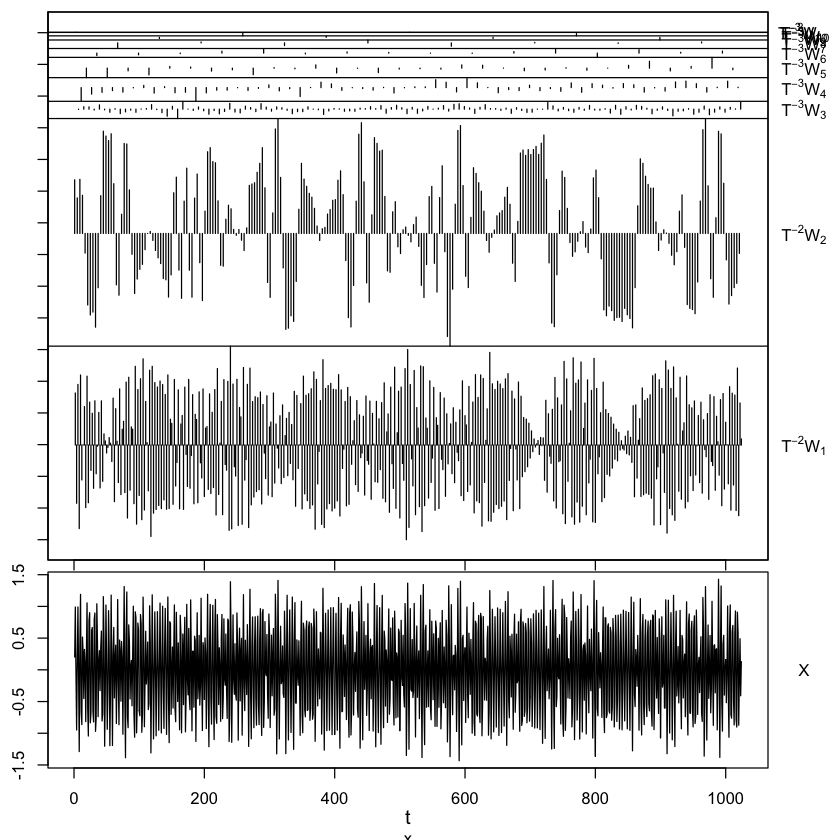

In [26]:
#https://cran.r-project.org/web/packages/wavelets/wavelets.pdf
library(wavelets)
s_w <- dwt(s, filter="la8", n.levels=10, boundary="periodic", fast=TRUE)
plot.dwt(s_w, levels = 10)

numeric(0)

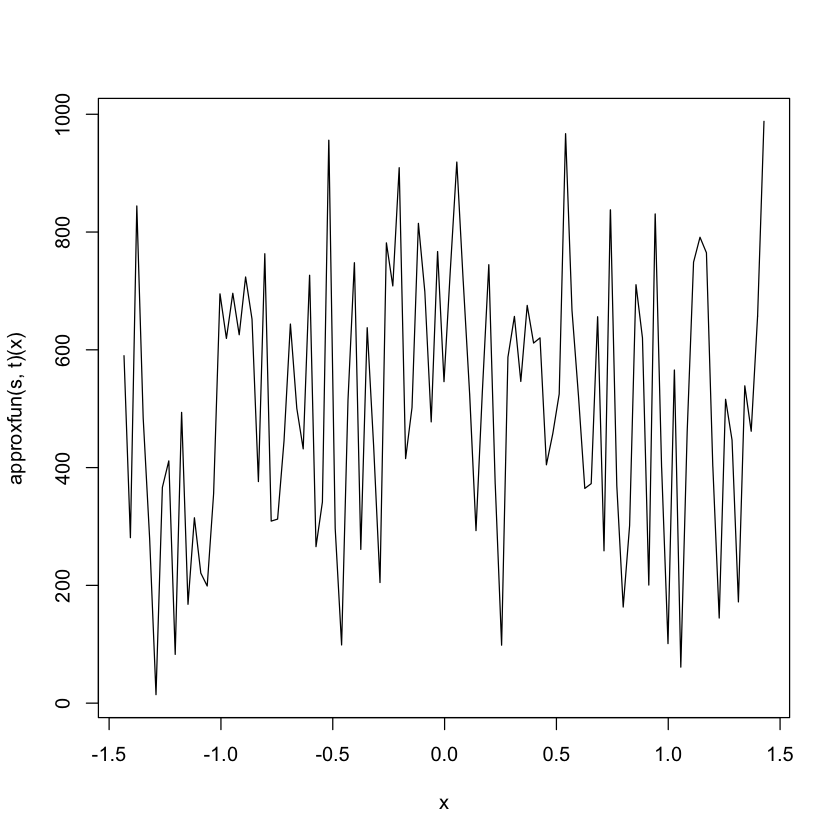

In [20]:
curve(approxfun(s, t)(x), min(s), max(s))
#title("Zero Crossing")
library(rootSolve)
uniroot.all(approxfun(s, t), interval = range(s))


Wave Object
	Number of Samples:      1024
	Duration (seconds):     0
	Samplingrate (Hertz):   2.5e+09
	Channels (Mono/Stereo): Mono
	PCM (integer format):   TRUE
	Bit (8/16/24/32/64):    8 


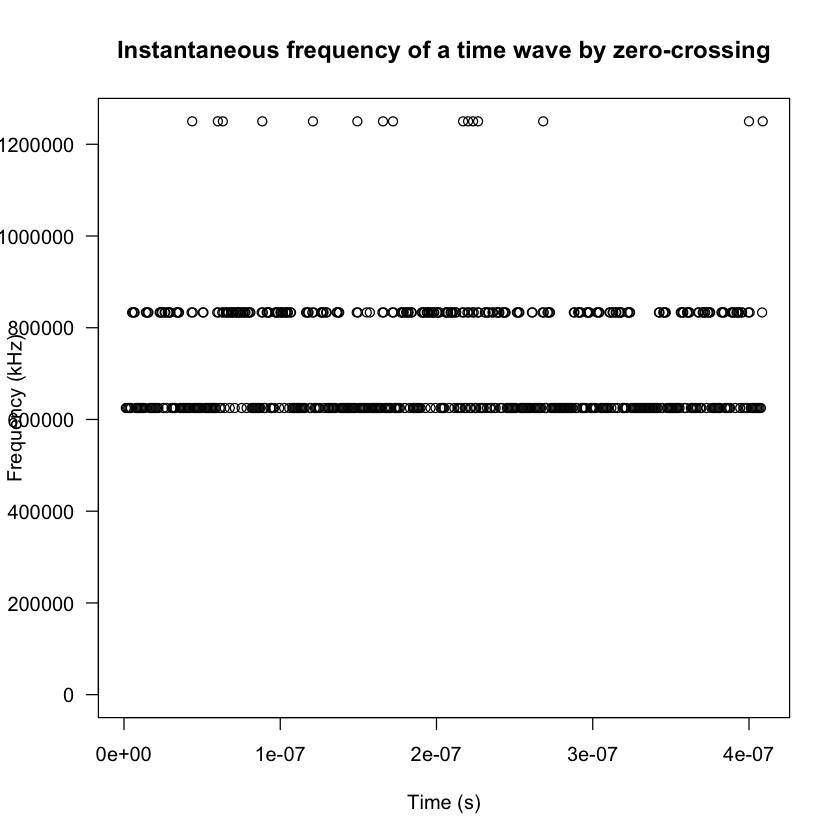

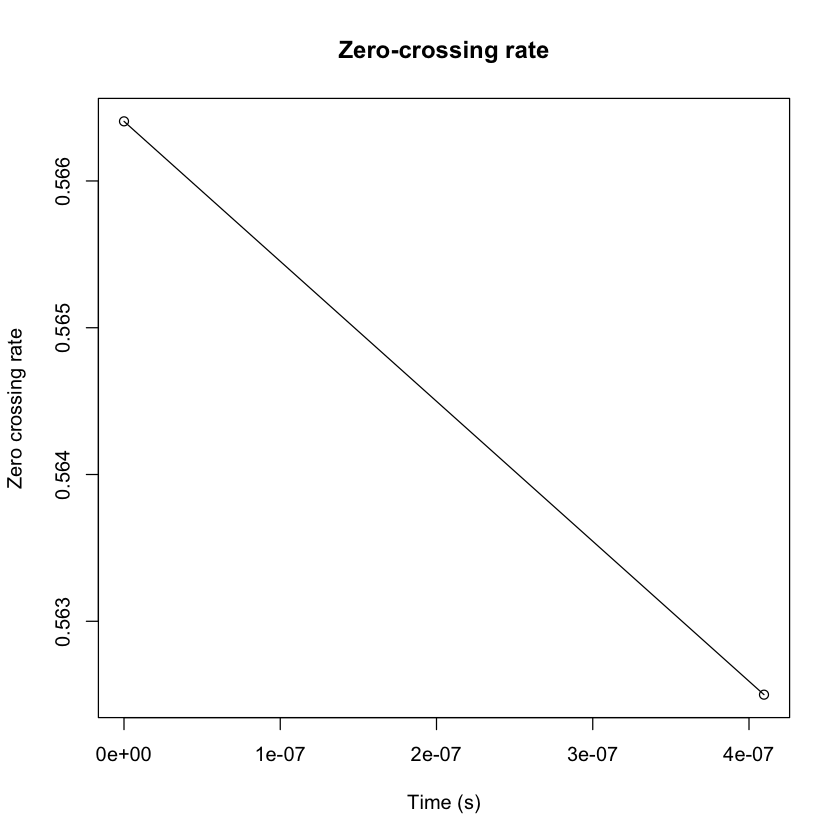

In [132]:
library(tuneR)
s_w <- Wave(left=s, samp.rate=2500000000, bit=8)
s_w

#https://cran.r-project.org/web/packages/seewave/seewave.pdf
library(seewave)
#If plot is FALSE, zc returns a two-column matrix, the first column corresponding to time in seconds (x-axis) 
#and the second column corresponding to the instantaneous frequency of the time wave in kHz (y-axis).
zc(s_w, plot=TRUE)
title("Instantaneous frequency of a time wave by zero-crossing")
zcr(s_w, plot=TRUE)
title("Zero-crossing rate")

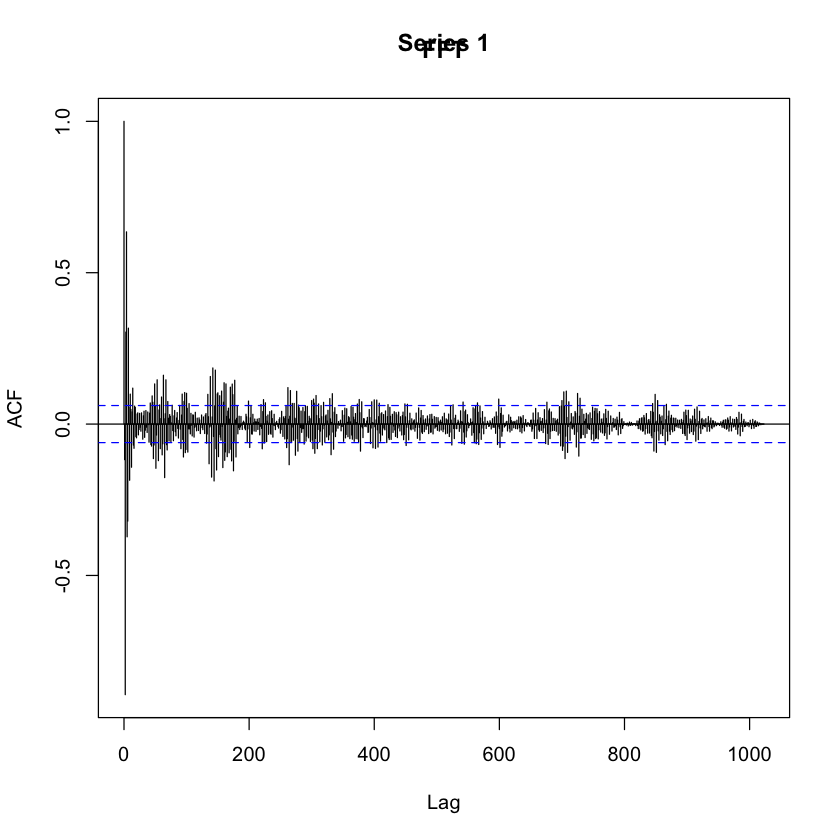

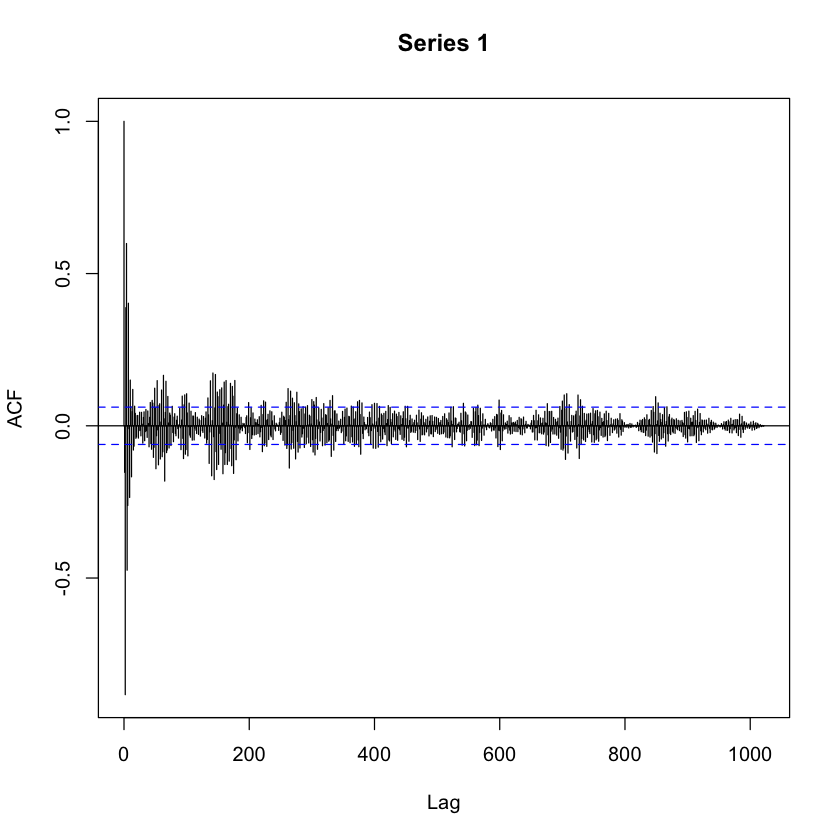

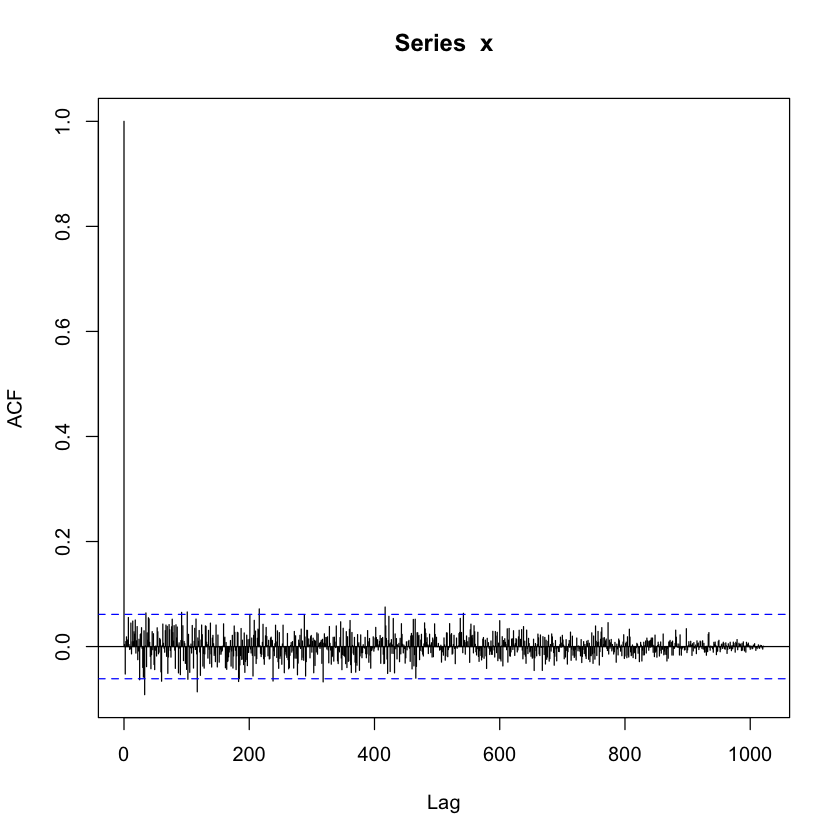

In [48]:
#AutoCorrelação
#https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/acf
#https://cran.r-project.org/web/packages/itsadug/vignettes/acf.html
acf (s, lag = 1023)
s_diff <- diff (s)
acf (s_diff, lag = 1023)
x <- rnorm (s_diff)
cr <- acf (x, lag = 1023)
#plot (cr, type = "o")

In [1]:
#Constellation Shape Features
#https://cran.r-project.org/web/packages/constellation/index.html
#https://cran.r-project.org/web/packages/constellation/vignettes/identify_sepsis.html
library(data.table)
tt <- seq(from = as.POSIXct("00:00:00", format="%H:%M:%S", tz="UTC"), length.out = 1024, by = "mins")
DF = data.table( ID = 1, TIME = tt, VALUE = s)
DF2 = data.table()


library(constellation)
DT_C_SHAPE <- value_change(DF, value = 1, direction = "up", window_hours = 18, join_key = "ID", time_var = "TIME", value_var = "VALUE.V1", mult = "all")
head(DT_C_SHAPE)

ERROR: Error in data.table(ID = 1, TIME = tt, VALUE = s): objet 's' introuvable


STFT object:
70-01-01 00:00:50.000 (Thu)  to  70-01-01 00:15:50.000 (Thu) 
19 increments of 50 s 
Window size:  100 ( 100 s ) -> f resolution:  0.01 Hz

------ 
{ stft(X = s, reassign = FALSE, plot.it = TRUE, win = 100) }

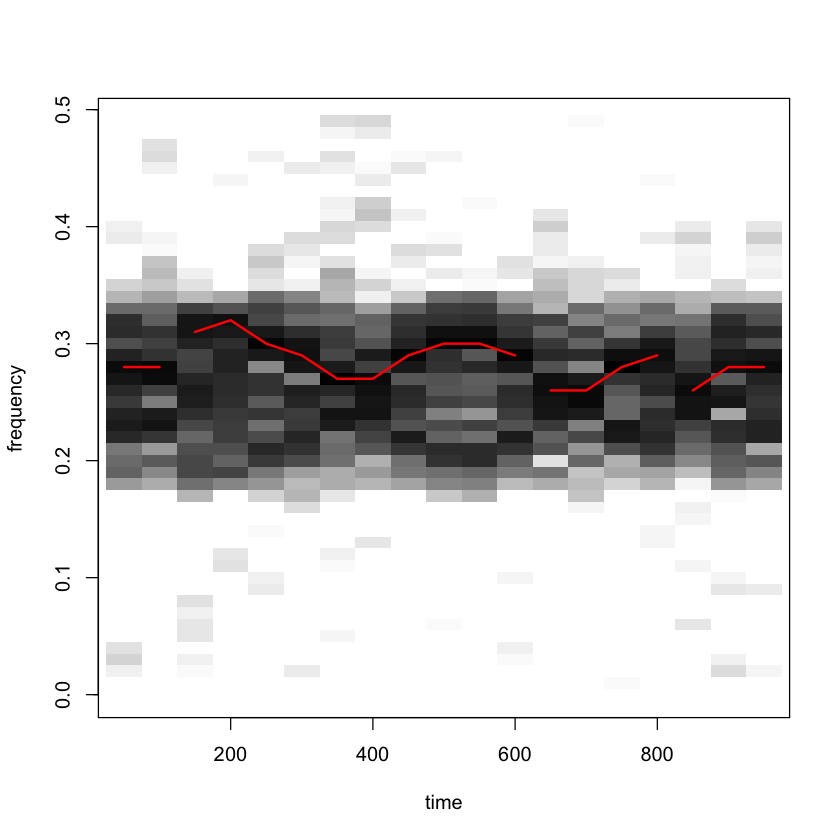

STFT object:
70-01-01 00:00:50.000 (Thu)  to  70-01-01 00:15:50.000 (Thu) 
19 increments of 50 s 
Window size:  100 ( 100 s ) -> f resolution:  0.01 Hz
[Reassign]
------ 
{ stft(X = s, reassign = TRUE, plot.it = TRUE, win = 100) }

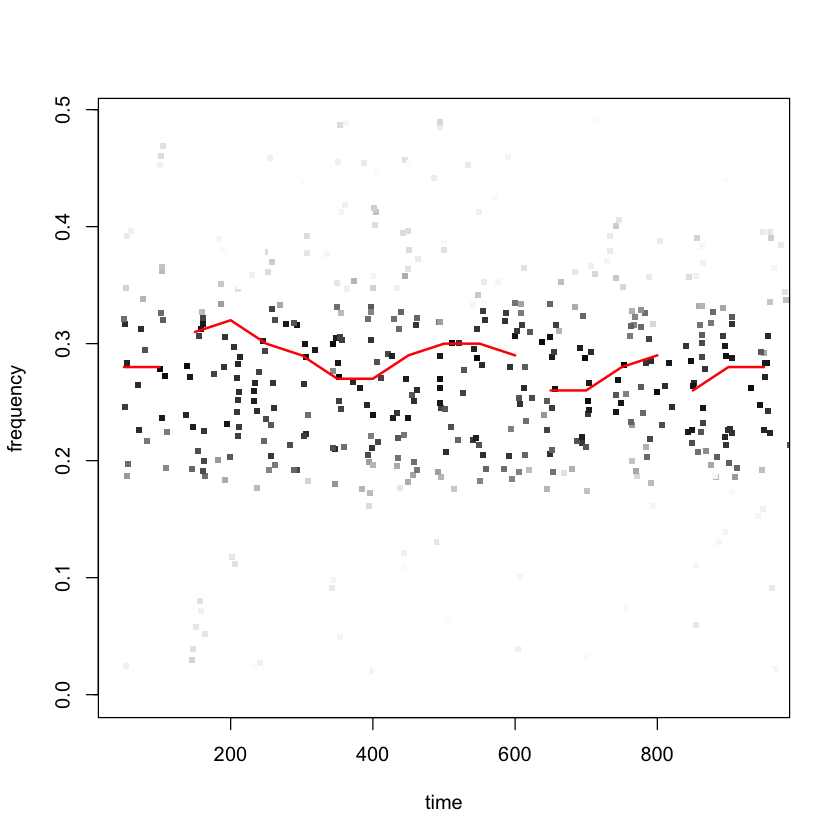

STFT object:
70-01-01 00:00:05.000 (Thu)  to  70-01-01 00:16:55.000 (Thu) 
203 increments of 5 s 
Window size:  10 ( 10 s ) -> f resolution:  0.1 Hz
[Reassign]
------ 
{ stft(X = s, plot.it = TRUE) }

ERROR: Error in stft(procfile, plot.it = TRUE, type = "sum", reassign = FALSE): objet 'procfile' introuvable


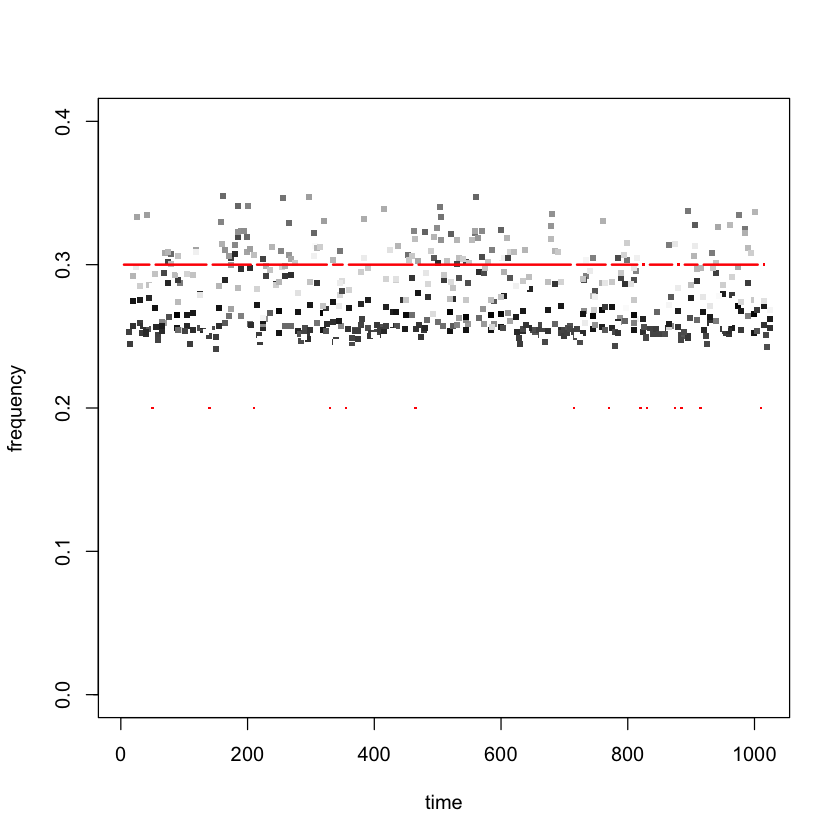

In [108]:
#https://cran.r-project.org/web/packages/GENEAread/GENEAread.pdf
library(GENEAread)
stft(s, plot = TRUE, reassign = FALSE, win = 100)
stft(s, plot = TRUE, reassign = TRUE, win = 100)
stft(s, plot.it = TRUE)
stft(procfile, plot.it = TRUE, type = "sum", reassign = FALSE)

# Just look at the last 50% of the data
stft(procfile, start = 0.5, plot.it = TRUE)
stft(procfile, type = "svm", reassign = FALSE, plot.it = TRUE)
stft(procfile, type = "svm", reassign = FALSE, plot.it = TRUE, win = 5)
stft(procfile, type = "svm", reassign = FALSE, plot.it = TRUE, win = 5, inc = 5)
stft(procfile, type = "svm", reassign = FALSE, plot.it = TRUE, wtype = "uniform.window")